# Semi-supervised Learning

* Preparing and executing partially and delayed labeling experiments

---

*More information about CapyMOA can be found in* https://www.capymoa.org

**notebook last updated on 25/07/2024**

In [1]:
# This cell is hidden on capymoa.org. See docs/contributing/docs.rst
from util.nbmock import mock_datasets, is_nb_fast

if is_nb_fast():
    mock_datasets()

In [2]:
from capymoa.evaluation.visualization import plot_windowed_results
from capymoa.evaluation import prequential_ssl_evaluation
from capymoa.datasets import Electricity

## 1. Learning using a SSL classifier

* This example uses the OSNN algorithm to learn from a stream with only 1% labeled data
* We utilize the `prequential_ssl_evaluation()` function to simulate the absence of labels (`label_probability`) and delays (`delay_length`)
* The results yield by `prequential_ssl_evaluation()` include more information in comparison to `prequential_evaluation()`, such as the number of unlabeled instances (`unlabeled`) and the unlabeled ratio (`unlabeled_ratio`). 

In [3]:
help(prequential_ssl_evaluation)

Help on function prequential_ssl_evaluation in module capymoa.evaluation.evaluation:

prequential_ssl_evaluation(stream: capymoa.stream._stream.Stream, learner: Union[capymoa.base.ClassifierSSL, capymoa.base.Classifier], max_instances: Optional[int] = None, window_size: int = 1000, initial_window_size: int = 0, delay_length: int = 0, label_probability: float = 0.01, random_seed: int = 1, store_predictions: bool = False, store_y: bool = False, optimise: bool = True, restart_stream: bool = True)
    Run and evaluate a learner on a semi-supervised stream using prequential evaluation.
    
    :param stream: A data stream to evaluate the learner on. Will be restarted if
        ``restart_stream`` is True.
    :param learner: The learner to evaluate. If the learner is an SSL learner,
        it will be trained on both labeled and unlabeled instances. If the
        learner is not an SSL learner, then it will be trained only on the
        labeled instances.
    :param max_instances: The num

51.6


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,100.0,34.0,0.000000,-340.000000,-112.903226,NaN,50.746269,NaN,NaN,34.000000,NaN,50.000000,100.000000,0.000000
1,200.0,65.0,0.000000,-150.000000,41.666667,NaN,78.787879,NaN,NaN,65.000000,NaN,50.000000,100.000000,0.000000
2,300.0,69.0,11.225659,-158.333333,16.216216,55.638707,31.111111,80.000000,55.372807,29.166667,81.578947,55.907173,33.333333,78.481013
3,400.0,66.0,17.794971,-209.090909,49.253731,61.319302,77.027027,34.615385,65.282392,66.279070,64.285714,57.809847,91.935484,23.684211
4,500.0,47.0,0.000000,-341.666667,-1.923077,NaN,63.945578,NaN,NaN,47.000000,NaN,50.000000,100.000000,0.000000
5,600.0,38.0,0.000000,-342.857143,-77.142857,NaN,55.072464,NaN,NaN,38.000000,NaN,50.000000,100.000000,0.000000
6,700.0,46.0,-13.493064,-200.000000,-8.000000,43.253468,55.737705,30.769231,43.253468,55.737705,30.769231,43.253468,55.737705,30.769231
7,800.0,34.0,-27.363952,-288.235294,-53.488372,35.160284,29.787234,37.735849,34.791935,37.837838,31.746032,35.536516,24.561404,46.511628
8,900.0,43.0,-5.166052,-200.000000,-5.555556,43.575709,9.523810,58.394161,40.489130,37.500000,43.478261,47.171717,5.454545,88.888889
9,1000.0,74.0,49.768161,-225.000000,48.000000,78.820463,68.292683,77.966102,81.944444,100.000000,63.888889,75.925926,51.851852,100.000000


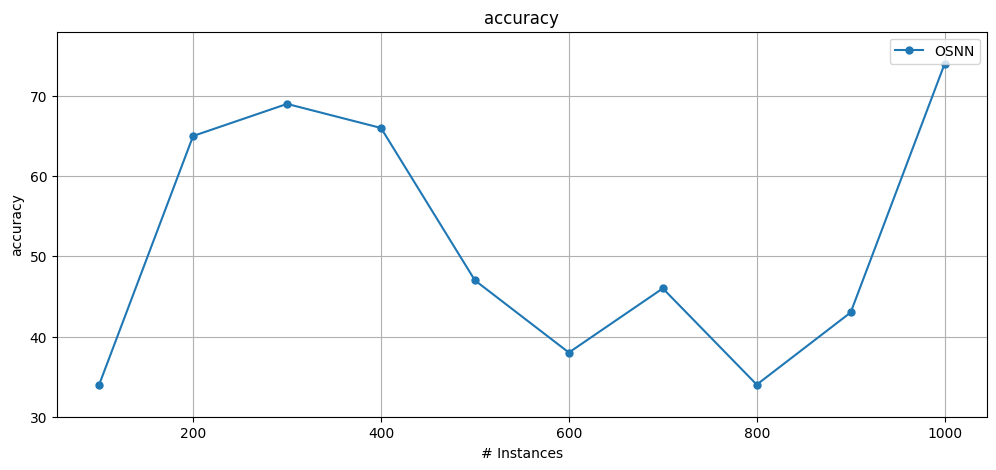

In [4]:
from capymoa.ssl.classifier import OSNN

stream = Electricity()

osnn = OSNN(schema=stream.get_schema(), optim_steps=10)

results_osnn = prequential_ssl_evaluation(
    stream=stream,
    learner=osnn,
    label_probability=0.01,
    window_size=100,
    max_instances=1000,
)

# The results are stored in a dictionary.
display(results_osnn)

print(
    results_osnn["cumulative"].accuracy()
)  # Test-then-train accuracy, i.e. cumulatively, not windowed.
display(
    results_osnn["windowed"].metrics_per_window()
)  # A dataframe containing the windowed results.

# Plotting over time (default: classifications correct (percent) i.e. accuracy)
results_osnn.learner = "OSNN"
plot_windowed_results(results_osnn, metric="accuracy")

## 1.1 Using a supervised model

* If a supervised model is used with `prequential_ssl_evaluation()` it will only be trained on the labeled data



In [5]:
from capymoa.classifier import StreamingRandomPatches

srp10 = StreamingRandomPatches(schema=stream.get_schema(), ensemble_size=10)

results_srp10 = prequential_ssl_evaluation(
    stream=stream,
    learner=srp10,
    label_probability=0.01,
    window_size=100,
    max_instances=1000,
)

print(results_srp10["cumulative"].accuracy())
display(results_srp10["windowed"].metrics_per_window())

47.199999999999996


,instances,accuracy,kappa,kappa_t,kappa_m,f1_score,f1_score_0,f1_score_1,precision,precision_0,precision_1,recall,recall_0,recall_1
0,100.0,34.0,0.000000,-340.000000,-112.903226,NaN,50.746269,NaN,NaN,34.000000,NaN,50.000000,100.000000,0.000000
1,200.0,65.0,0.000000,-150.000000,41.666667,NaN,78.787879,NaN,NaN,65.000000,NaN,50.000000,100.000000,0.000000
2,300.0,21.0,0.000000,-558.333333,-113.513514,NaN,34.710744,NaN,NaN,21.000000,NaN,50.000000,100.000000,0.000000
3,400.0,62.0,0.000000,-245.454545,43.283582,NaN,76.543210,NaN,NaN,62.000000,NaN,50.000000,100.000000,0.000000
4,500.0,50.0,5.338887,-316.666667,3.846154,61.726883,65.277778,10.714286,74.226804,48.453608,100.000000,52.830189,100.000000,5.660377
5,600.0,38.0,-7.489598,-342.857143,-77.142857,44.007051,48.333333,22.500000,42.682927,35.365854,50.000000,45.415959,76.315789,14.516129
6,700.0,26.0,-39.992433,-311.111111,-48.000000,27.554157,24.489796,27.450980,27.327327,32.432432,22.222222,27.784784,19.672131,35.897436
7,800.0,62.0,13.043478,-123.529412,11.627907,65.753425,75.000000,20.833333,80.000000,60.000000,100.000000,55.813953,100.000000,11.627907
8,900.0,59.0,10.480349,-115.789474,24.074074,60.034800,72.108844,22.641509,66.304348,57.608696,75.000000,54.848485,96.363636,13.333333
9,1000.0,55.0,2.343750,-462.500000,10.000000,61.508853,70.588235,4.255319,77.272727,54.545455,100.000000,51.086957,100.000000,2.173913


## 1.2 Comparing a SSL and supervised classifiers

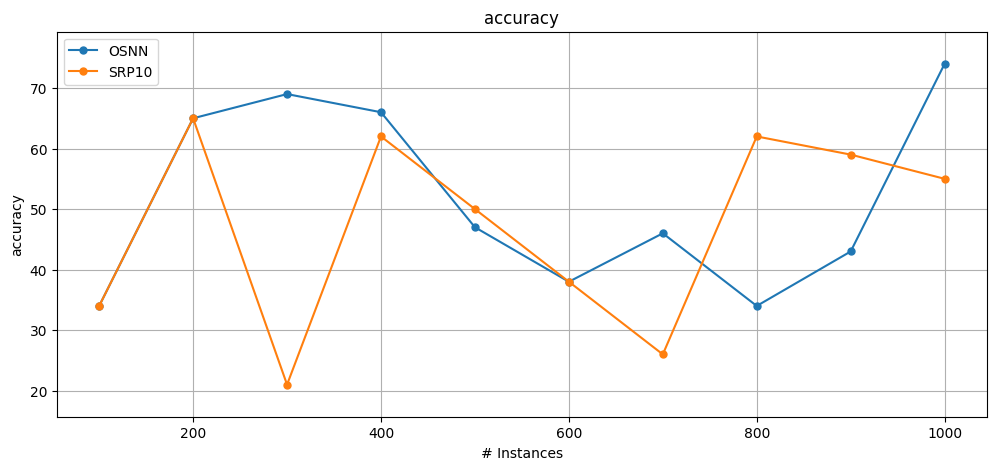

In [6]:
# Plotting all the results together
# Adding an experiment_id to the results dictionary allows controlling the legend of each learner.
results_osnn.learner = "OSNN"
results_srp10.learner = "SRP10"

plot_windowed_results(results_osnn, results_srp10, metric="accuracy")

## 2. Delay example
* Comparing the effect of delay on a stream
* It is particularly interesting to see the effect after a drift takes place. 

Accuracy immediate: 84.517
Accuracy delayed by 1000 instances: 83.366


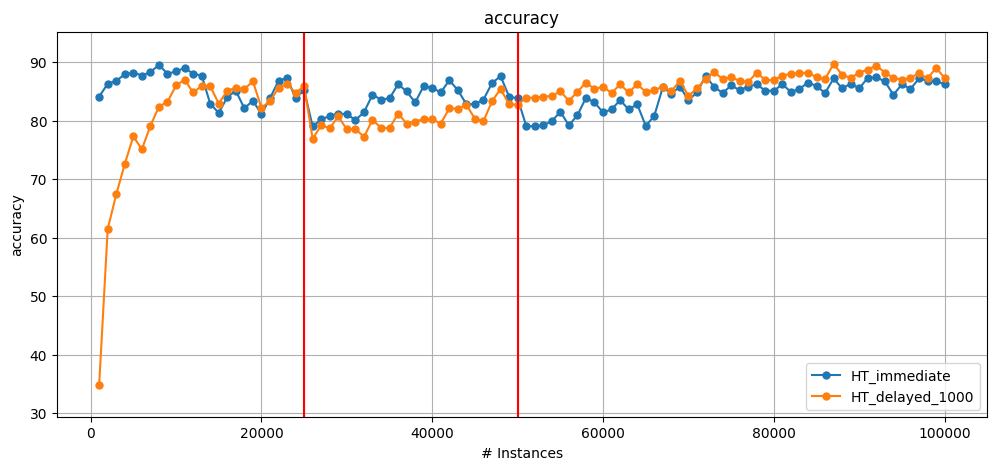

In [7]:
from capymoa.stream.generator import SEA
from capymoa.stream.drift import DriftStream, AbruptDrift
from capymoa.classifier import HoeffdingTree

## Creating a stream with drift
sea2drifts = DriftStream(
    stream=[
        SEA(function=1),
        AbruptDrift(position=25000),
        SEA(function=2),
        AbruptDrift(position=50000),
        SEA(function=3),
    ]
)


ht_immediate = HoeffdingTree(schema=sea2drifts.get_schema())
ht_delayed = HoeffdingTree(schema=sea2drifts.get_schema())

results_ht_immediate = prequential_ssl_evaluation(
    stream=sea2drifts,
    learner=ht_immediate,
    label_probability=0.1,
    window_size=1000,
    max_instances=100000,
)

results_ht_delayed_1000 = prequential_ssl_evaluation(
    stream=sea2drifts,
    learner=ht_delayed,
    label_probability=0.01,
    delay_length=1000,  # adding the delay
    window_size=1000,
    max_instances=100000,
)

results_ht_immediate.learner = "HT_immediate"
results_ht_delayed_1000.learner = "HT_delayed_1000"

print(f"Accuracy immediate: {results_ht_immediate['cumulative'].accuracy()}")
print(
    f"Accuracy delayed by 1000 instances: {results_ht_delayed_1000['cumulative'].accuracy()}"
)

plot_windowed_results(results_ht_immediate, results_ht_delayed_1000, metric="accuracy")